In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("/content/synthetic_swopno_transactions_200.csv")

In [ ]:
dataset.head()

,InvoiceNo,CustomerID,CustomerPhoneNo,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,Location,Email
0,INV10000,CUST1096,8.800000e+12,Biscuits 200g,7,6/30/2024,208.15,1457.05,Mirpur,dummy@gmail.com
1,INV10001,CUST1095,8.800000e+12,Biscuits 200g,4,2/26/2025,442.23,1768.92,Mohammadpur,dummy@gmail.com
2,INV10002,CUST1070,8.800000e+12,Biscuits 200g,8,1/26/2024,180.49,1443.92,Gulshan,dummy@gmail.com
3,INV10003,CUST1078,8.800000e+12,Cooking Oil 1L,5,7/2/2024,1113.40,5567.00,Banani,dummy@gmail.com
4,INV10004,CUST1029,8.800000e+12,Sugar 1kg,7,12/6/2024,1058.94,7412.58,Dhanmondi,dummy@gmail.com


In [ ]:
dataset.dtypes

,0
InvoiceNo,object
CustomerID,object
CustomerPhoneNo,float64
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
TotalPrice,float64
Location,object
Email,object


In [ ]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

In [ ]:
dataset.dtypes

,0
InvoiceNo,object
CustomerID,object
CustomerPhoneNo,float64
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
TotalPrice,float64
Location,object
Email,object


In [ ]:
current_date = pd.to_datetime('2026-01-01')
current_date

Timestamp('2026-01-01 00:00:00')

In [ ]:
dataset.head()

,InvoiceNo,CustomerID,CustomerPhoneNo,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,Location,Email
0,INV10000,CUST1096,8.800000e+12,Biscuits 200g,7,2024-06-30,208.15,1457.05,Mirpur,dummy@gmail.com
1,INV10001,CUST1095,8.800000e+12,Biscuits 200g,4,2025-02-26,442.23,1768.92,Mohammadpur,dummy@gmail.com
2,INV10002,CUST1070,8.800000e+12,Biscuits 200g,8,2024-01-26,180.49,1443.92,Gulshan,dummy@gmail.com
3,INV10003,CUST1078,8.800000e+12,Cooking Oil 1L,5,2024-07-02,1113.40,5567.00,Banani,dummy@gmail.com
4,INV10004,CUST1029,8.800000e+12,Sugar 1kg,7,2024-12-06,1058.94,7412.58,Dhanmondi,dummy@gmail.com


In [ ]:
max_date = dataset.groupby(["CustomerID"]).max()[['InvoiceDate']]
max_date # latest of each customer

,InvoiceDate
CustomerID,
CUST1002,2025-01-28
CUST1003,2025-08-13
CUST1004,2025-10-03
CUST1006,2025-03-17
CUST1007,2024-04-28
...,...
CUST1096,2025-07-15
CUST1097,2025-04-05
CUST1098,2025-04-22


In [ ]:
max_date['InvoiceAge'] = (current_date - max_date['InvoiceDate']).dt.days
max_date

,InvoiceDate,InvoiceAge
CustomerID,,
CUST1002,2025-01-28,338
CUST1003,2025-08-13,141
CUST1004,2025-10-03,90
CUST1006,2025-03-17,290
CUST1007,2024-04-28,613
...,...,...
CUST1096,2025-07-15,170
CUST1097,2025-04-05,271
CUST1098,2025-04-22,254


In [ ]:
print(max_date['InvoiceAge'].min(),"days")
print(max_date['InvoiceAge'].max(),"days")
print("Duration:", max_date['InvoiceAge'].max() - max_date['InvoiceAge'].min(),"days")

75 days
726 days
Duration: 651 days


In [ ]:
#recenccy
recency = max_date.drop('InvoiceDate', axis=1)
recency

,InvoiceAge
CustomerID,
CUST1002,338
CUST1003,141
CUST1004,90
CUST1006,290
CUST1007,613
...,...
CUST1096,170
CUST1097,271
CUST1098,254


In [ ]:
#frequency
freq = dataset.drop_duplicates(subset="InvoiceNo")
freq

,InvoiceNo,CustomerID,CustomerPhoneNo,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,Location,Email
0,INV10000,CUST1096,8.800000e+12,Biscuits 200g,7,2024-06-30,208.15,1457.05,Mirpur,dummy@gmail.com
1,INV10001,CUST1095,8.800000e+12,Biscuits 200g,4,2025-02-26,442.23,1768.92,Mohammadpur,dummy@gmail.com
2,INV10002,CUST1070,8.800000e+12,Biscuits 200g,8,2024-01-26,180.49,1443.92,Gulshan,dummy@gmail.com
3,INV10003,CUST1078,8.800000e+12,Cooking Oil 1L,5,2024-07-02,1113.40,5567.00,Banani,dummy@gmail.com
4,INV10004,CUST1029,8.800000e+12,Sugar 1kg,7,2024-12-06,1058.94,7412.58,Dhanmondi,dummy@gmail.com
...,...,...,...,...,...,...,...,...,...,...
195,INV10195,CUST1052,8.800000e+12,Biscuits 200g,1,2024-12-26,131.87,131.87,Uttara,dummy@gmail.com
196,INV10196,CUST1089,8.800000e+12,Tea Pack 250g,8,2024-11-01,416.82,3334.56,Bashundhara,dummy@gmail.com
197,INV10197,CUST1032,8.800000e+12,Biscuits 200g,7,2025-02-03,1021.61,7151.27,Tejgaon,dummy@gmail.com
198,INV10198,CUST1040,8.800000e+12,Shampoo 200ml,2,2025-03-05,76.76,153.52,Motijheel,dummy@gmail.com


In [ ]:
freq = freq.groupby(["CustomerID"]).count()[["InvoiceNo"]]
freq # calculating the purchase frequency of each customer

,InvoiceNo
CustomerID,
CUST1002,2
CUST1003,3
CUST1004,6
CUST1006,2
CUST1007,2
...,...
CUST1096,3
CUST1097,3
CUST1098,2


In [ ]:
freq['InvoiceNo'].max()

6

In [ ]:
freq['InvoiceNo'].min()

1

In [ ]:
dataset["Total_in_BDT"]=dataset["Quantity"] * dataset["UnitPrice"]
dataset

,InvoiceNo,CustomerID,CustomerPhoneNo,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,Location,Email,Total_in_BDT
0,INV10000,CUST1096,8.800000e+12,Biscuits 200g,7,2024-06-30,208.15,1457.05,Mirpur,dummy@gmail.com,1457.05
1,INV10001,CUST1095,8.800000e+12,Biscuits 200g,4,2025-02-26,442.23,1768.92,Mohammadpur,dummy@gmail.com,1768.92
2,INV10002,CUST1070,8.800000e+12,Biscuits 200g,8,2024-01-26,180.49,1443.92,Gulshan,dummy@gmail.com,1443.92
3,INV10003,CUST1078,8.800000e+12,Cooking Oil 1L,5,2024-07-02,1113.40,5567.00,Banani,dummy@gmail.com,5567.00
4,INV10004,CUST1029,8.800000e+12,Sugar 1kg,7,2024-12-06,1058.94,7412.58,Dhanmondi,dummy@gmail.com,7412.58
...,...,...,...,...,...,...,...,...,...,...,...
195,INV10195,CUST1052,8.800000e+12,Biscuits 200g,1,2024-12-26,131.87,131.87,Uttara,dummy@gmail.com,131.87
196,INV10196,CUST1089,8.800000e+12,Tea Pack 250g,8,2024-11-01,416.82,3334.56,Bashundhara,dummy@gmail.com,3334.56
197,INV10197,CUST1032,8.800000e+12,Biscuits 200g,7,2025-02-03,1021.61,7151.27,Tejgaon,dummy@gmail.com,7151.27
198,INV10198,CUST1040,8.800000e+12,Shampoo 200ml,2,2025-03-05,76.76,153.52,Motijheel,dummy@gmail.com,153.52


In [ ]:
#monetary
money=dataset.groupby(["CustomerID"])[["Total_in_BDT"]].sum()
money

,Total_in_BDT
CustomerID,
CUST1002,3542.67
CUST1003,4105.70
CUST1004,21812.66
CUST1006,2147.56
CUST1007,6436.01
...,...
CUST1096,4440.61
CUST1097,11315.26
CUST1098,8007.11


In [ ]:
RFM = pd.concat([recency,freq,money], axis=1)
RFM

,InvoiceAge,InvoiceNo,Total_in_BDT
CustomerID,,,
CUST1002,338,2,3542.67
CUST1003,141,3,4105.70
CUST1004,90,6,21812.66
CUST1006,290,2,2147.56
CUST1007,613,2,6436.01
...,...,...,...
CUST1096,170,3,4440.61
CUST1097,271,3,11315.26
CUST1098,254,2,8007.11


In [ ]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
CUST1002,338,2,3542.67
CUST1003,141,3,4105.70
CUST1004,90,6,21812.66
CUST1006,290,2,2147.56
CUST1007,613,2,6436.01
...,...,...,...
CUST1096,170,3,4440.61
CUST1097,271,3,11315.26
CUST1098,254,2,8007.11


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

In [ ]:
scaled.shape

(86, 3)

In [ ]:
# Define a range of possible cluster numbers (k) to try
k_range = range(2, 11)

# Create an empty list to store the Sum of Squared Errors (SSE) for each k
sse = []

# Loop through each value of k in the defined range
for k in k_range:
    # Initialize the KMeans model with the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added random_state and n_init for reproducibility

    # Fit the KMeans model to the scaled data
    km.fit(scaled)

    # Append the calculated SSE (inertia_) for the current k to the sse list
    sse.append(km.inertia_)

# The 'sse' list now contains the SSE values for each tested k.
# This list is often used to create an "elbow plot" to visually identify the optimal k.

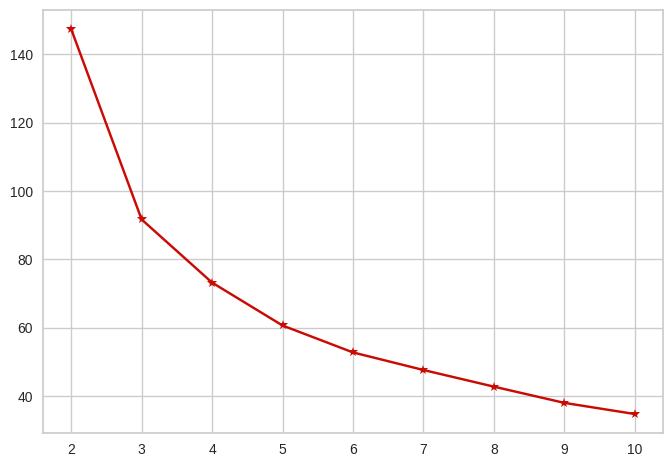

In [ ]:
plt.plot(k_range, sse, 'r-*')
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

In [ ]:
!pip install yellowbrick

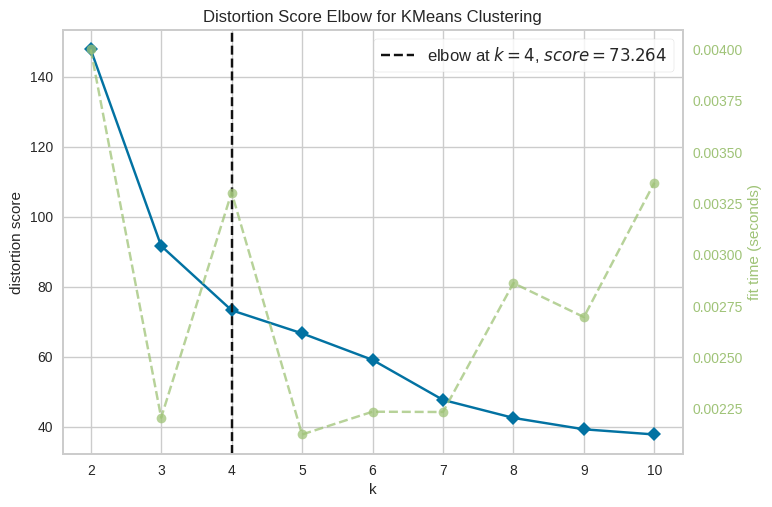

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(scaled)
Elbow.show()

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 3, 1, 0, 2, 3, 2, 3, 3, 3, 0, 2, 0, 3, 0, 2, 3, 3, 0, 2, 0, 0,
       1, 1, 1, 3, 0, 1, 1, 3, 0, 1, 1, 1, 0, 2, 2, 3, 3, 2, 3, 3, 0, 3,
       3, 1, 2, 0, 1, 1, 3, 1, 2, 3, 3, 0, 0, 3, 1, 0, 3, 1, 3, 0, 3, 0,
       3, 2, 3, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 3, 1, 0, 2, 0],
      dtype=int32)

In [ ]:
kmeans.labels_.shape

(86,)

In [ ]:
RFM["Clusters"]=(kmeans.labels_)
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
CUST1002,338,2,3542.67,0
CUST1003,141,3,4105.70,3
CUST1004,90,6,21812.66,1
CUST1006,290,2,2147.56,0
CUST1007,613,2,6436.01,2
...,...,...,...,...
CUST1096,170,3,4440.61,3
CUST1097,271,3,11315.26,1
CUST1098,254,2,8007.11,0


In [ ]:
RFM.Clusters.unique()

array([0, 3, 1, 2], dtype=int32)

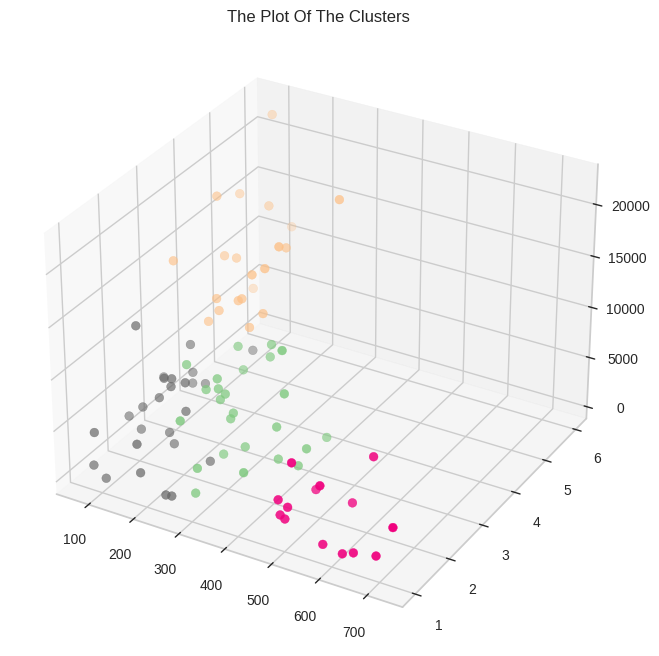

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(RFM["Recency"],RFM["Frequency"],RFM["Monetary"], s=40, c=RFM["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
RFM[RFM.Clusters==0]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
CUST1002,338,2,3542.67,0
CUST1006,290,2,2147.56,0
CUST1015,420,2,13966.56,0
CUST1017,313,2,6508.91,0
CUST1020,212,2,9875.07,0
CUST1024,281,2,8443.74,0
CUST1026,410,2,3343.74,0
CUST1028,439,3,2739.68,0
CUST1034,453,2,3298.74,0


In [ ]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
CUST1004,90,6,21812.66,1
CUST1029,391,4,22241.76,1
CUST1031,306,3,17414.17,1
CUST1032,93,5,16661.68,1
CUST1035,104,3,15675.20,1
CUST1036,275,4,16256.71,1
CUST1040,255,3,13887.81,1
CUST1042,137,4,13799.88,1
CUST1044,121,5,7543.87,1


In [ ]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
CUST1007,613,2,6436.01,2
CUST1010,645,1,857.26,2
CUST1016,581,1,729.46,2
CUST1021,516,1,7664.13,2
CUST1025,575,1,6310.24,2
CUST1046,491,1,2274.69,2
CUST1047,726,1,4506.25,2
CUST1050,692,1,1256.56,2
CUST1058,569,2,1308.05,2


In [ ]:
RFM[RFM.Clusters==3]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
CUST1003,141,3,4105.70,3
CUST1009,180,2,1640.35,3
CUST1011,75,3,3845.66,3
CUST1012,170,2,2626.88,3
CUST1014,138,3,7912.29,3
CUST1018,182,1,4767.28,3
CUST1022,149,2,5794.35,3
CUST1023,256,1,712.35,3
CUST1033,208,2,8055.58,3


In [ ]:
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
0,333.240000,2.040000,6773.688000
1,207.952381,3.809524,15064.460000
2,572.571429,1.214286,3015.800714
3,157.692308,2.000000,4396.927692


In [ ]:
def func(row):
  if row["Clusters"]==0:
    return "Bronze"
  elif row["Clusters"]==1:
    return "Silver"
  elif row["Clusters"]==2:
    return "Gold"
  else:
    return "Platinum"

RFM['Group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
CUST1002,338,2,3542.67,0,Bronze
CUST1003,141,3,4105.70,3,Platinum
CUST1004,90,6,21812.66,1,Silver
CUST1006,290,2,2147.56,0,Bronze
CUST1007,613,2,6436.01,2,Gold
...,...,...,...,...,...
CUST1096,170,3,4440.61,3,Platinum
CUST1097,271,3,11315.26,1,Silver
CUST1098,254,2,8007.11,0,Bronze


In [ ]:
result = pd.DataFrame(RFM.Group.value_counts())
result

,count
Group,
Platinum,26
Bronze,25
Silver,21
Gold,14


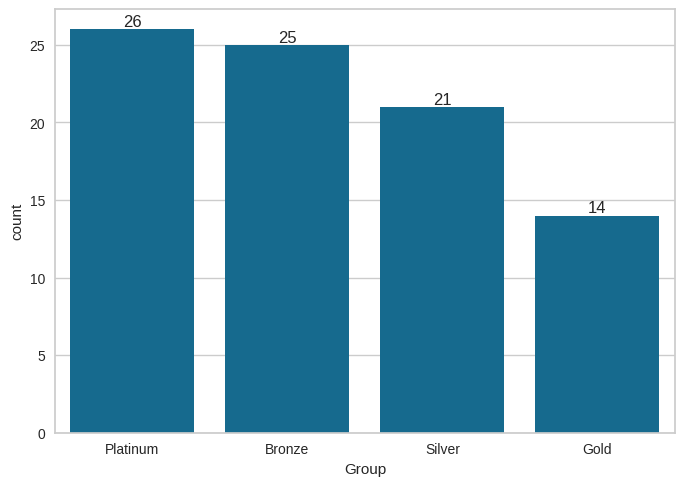

In [ ]:
result = result.sort_values(by='count', ascending=False)
datalabel = sns.barplot(x="Group", y="count", data=result, estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
CUST1002,338,2,3542.67,0,Bronze
CUST1003,141,3,4105.70,3,Platinum
CUST1004,90,6,21812.66,1,Silver
CUST1006,290,2,2147.56,0,Bronze
CUST1007,613,2,6436.01,2,Gold
...,...,...,...,...,...
CUST1096,170,3,4440.61,3,Platinum
CUST1097,271,3,11315.26,1,Silver
CUST1098,254,2,8007.11,0,Bronze


In [ ]:
bronze_customers = RFM[RFM['Group'] == 'Bronze']
bronze_contact_info = pd.merge(bronze_customers, dataset[['CustomerID', 'Location','CustomerPhoneNo', 'Email']], on='CustomerID', how='left')
display(bronze_contact_info[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']])

,CustomerID,Location,CustomerPhoneNo,Email
0,CUST1002,Gulshan,8.800000e+12,khalid35-877@diu.edu.bd
1,CUST1002,Dhanmondi,8.800000e+12,dummy@gmail.com
2,CUST1006,Mirpur,8.800000e+12,dummy@gmail.com
3,CUST1006,Gulshan,8.800000e+12,dummy@gmail.com
4,CUST1015,Gulshan,8.800000e+12,dummy@gmail.com
5,CUST1015,Uttara,8.800000e+12,dummy@gmail.com
6,CUST1017,Farmgate,8.800000e+12,dummy@gmail.com
7,CUST1017,Farmgate,8.800000e+12,dummy@gmail.com
8,CUST1020,Tejgaon,8.800000e+12,dummy@gmail.com
9,CUST1020,Mohammadpur,8.800000e+12,dummy@gmail.com


In [ ]:
silver_customers = RFM[RFM['Group'] == 'Silver']
silver_contact_info = pd.merge(silver_customers, dataset[['CustomerID', 'Location','CustomerPhoneNo', 'Email']], on='CustomerID', how='left')
display(silver_contact_info[['CustomerID', 'Location','CustomerPhoneNo', 'Email']])

,CustomerID,Location,CustomerPhoneNo,Email
0,CUST1004,Mirpur,8.800000e+12,khalid35-877@diu.edu.bd
1,CUST1004,Gulshan,8.800000e+12,dummy@gmail.com
2,CUST1004,Tejgaon,8.800000e+12,dummy@gmail.com
3,CUST1004,Gulshan,8.800000e+12,dummy@gmail.com
4,CUST1004,Mohammadpur,8.800000e+12,dummy@gmail.com
...,...,...,...,...
75,CUST1092,Tejgaon,8.800000e+12,dummy@gmail.com
76,CUST1092,Motijheel,8.800000e+12,dummy@gmail.com
77,CUST1097,Uttara,8.800000e+12,dummy@gmail.com
78,CUST1097,Mohammadpur,8.800000e+12,dummy@gmail.com


In [ ]:
gold_customers = RFM[RFM['Group'] == 'Gold']
gold_contact_info = pd.merge(gold_customers, dataset[['CustomerID', 'Location','CustomerPhoneNo', 'Email']], on='CustomerID', how='left')
display(gold_contact_info[['CustomerID', 'Location','CustomerPhoneNo', 'Email']])

,CustomerID,Location,CustomerPhoneNo,Email
0,CUST1007,Dhanmondi,8.800000e+12,khalid35-877@diu.edu.bd
1,CUST1007,Banani,8.800000e+12,dummy@gmail.com
2,CUST1010,Farmgate,8.800000e+12,dummy@gmail.com
3,CUST1016,Mirpur,8.800000e+12,dummy@gmail.com
4,CUST1021,Tejgaon,8.800000e+12,dummy@gmail.com
5,CUST1025,Bashundhara,8.800000e+12,dummy@gmail.com
6,CUST1046,Bashundhara,8.800000e+12,dummy@gmail.com
7,CUST1047,Tejgaon,8.800000e+12,dummy@gmail.com
8,CUST1050,Mohammadpur,8.800000e+12,dummy@gmail.com
9,CUST1058,Mohammadpur,8.800000e+12,dummy@gmail.com


In [ ]:
platinum_customers = RFM[RFM['Group'] == 'Platinum']
platinum_contact_info = pd.merge(platinum_customers, dataset[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']], on='CustomerID', how='left')
display(platinum_contact_info[['CustomerID','Location', 'CustomerPhoneNo', 'Email']])

,CustomerID,Location,CustomerPhoneNo,Email
0,CUST1003,Mirpur,8.800000e+12,khalid35-877@diu.edu.bd
1,CUST1003,Uttara,8.800000e+12,dummy@gmail.com
2,CUST1003,Mohammadpur,8.800000e+12,dummy@gmail.com
3,CUST1009,Tejgaon,8.800000e+12,dummy@gmail.com
4,CUST1009,Motijheel,8.800000e+12,dummy@gmail.com
5,CUST1011,Motijheel,8.800000e+12,dummy@gmail.com
6,CUST1011,Motijheel,8.800000e+12,dummy@gmail.com
7,CUST1011,Tejgaon,8.800000e+12,dummy@gmail.com
8,CUST1012,Farmgate,8.800000e+12,dummy@gmail.com
9,CUST1012,Gulshan,8.800000e+12,dummy@gmail.com


In [ ]:
# Save contact information for each group to CSV files

if 'bronze_contact_info' in locals():
    bronze_contact_info[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']].to_csv('bronze_contact_info.csv', index=False)
    print("Saved bronze_contact_info.csv")
else:
    print("bronze_contact_info DataFrame not found.")

if 'silver_contact_info' in locals():
    silver_contact_info[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']].to_csv('silver_contact_info.csv', index=False)
    print("Saved silver_contact_info.csv")
else:
    print("silver_contact_info DataFrame not found.")

if 'gold_contact_info' in locals():
    gold_contact_info[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']].to_csv('gold_contact_info.csv', index=False)
    print("Saved gold_contact_info.csv")
else:
    print("gold_contact_info DataFrame not found.")

if 'platinum_contact_info' in locals():
    platinum_contact_info[['CustomerID', 'Location', 'CustomerPhoneNo', 'Email']].to_csv('platinum_contact_info.csv', index=False)
    print("Saved platinum_contact_info.csv")
else:
    print("platinum_contact_info DataFrame not found.")

Saved bronze_contact_info.csv
Saved silver_contact_info.csv
Saved gold_contact_info.csv
Saved platinum_contact_info.csv


In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import pandas as pd
# Used to securely store your API key
from google.colab import userdata


# -------------------------------------------
# ✉️ SMTP Configuration (edit only these two lines)
# -------------------------------------------
sender_email = input("Enter your sender email: ").strip()
# Access password securely using Colab Secrets Manager
sender_password = userdata.get('GMAIL_APP_PASSWORD')

SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587

# -------------------------------------------
# 📩 Function: Send Single Email
# -------------------------------------------
def send_campaign_email(recipient_email, subject, body):
    """
    Sends a single campaign email to a recipient.

    Parameters:
        recipient_email (str): The email address of the recipient.
        subject (str): The subject line of the email.
        body (str): The plain-text message body to send.

    Returns:
        None. Prints success or failure messages to the console.
    """
    try:
        # Create the email message
        message = MIMEMultipart()
        message["From"] = sender_email
        message["To"] = recipient_email
        message["Subject"] = subject
        message.attach(MIMEText(body, "plain"))

        # Connect to the SMTP server and send the message
        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()  # Secure the connection
            server.login(sender_email, sender_password)
            server.send_message(message)

        print(f"✅ Email sent successfully to {recipient_email}")

    except Exception as e:
        print(f"❌ Failed to send email to {recipient_email}: {e}")

# -------------------------------------------
# 🎯 Campaign Details per Customer Segment
# -------------------------------------------
campaign_groups_contact = {
    'Bronze': {
        'filename': 'bronze_contact_info.csv',
        'subject': 'A Special Offer for You!',
        'message': "We’ve missed you! Enjoy up to 50% off — just for coming back."
    },
    'Silver': {
        'filename': 'silver_contact_info.csv',
        'subject': 'Your Exclusive Silver Offer!',
        'message': "Your exclusive comeback offer: up to 35% off."
    },
    'Gold': {
        'filename': 'gold_contact_info.csv',
        'subject': 'Gold Perks Just For You!',
        'message': "Gold perks unlocked! Get your exclusive 25% comeback deal!"
    },
    'Platinum': {
        'filename': 'platinum_contact_info.csv',
        'subject': 'Thank You, Platinum Customer!',
        'message': "Platinum members only: Enjoy 10% off at any brunch spot."
    }
}

# -------------------------------------------
# 🚀 Main Loop: Read Contacts & Send Emails
# -------------------------------------------
for group_name, group_info in campaign_groups_contact.items():
    try:
        contact_df = pd.read_csv(group_info['filename'])

        if 'Email' in contact_df.columns and 'CustomerID' in contact_df.columns:
            print(f"\n📢 Sending emails to {group_name} customers...")
            for _, row in contact_df.iterrows():
                customer_id = row['CustomerID']
                customer_email = row['Email']

                subject = group_info['subject']
                body = f"Dear {customer_id},\n\n{group_info['message']}\n\nBest Regards,\nSwopno Customer Care Team"

                send_campaign_email(customer_email, subject, body)

        else:
            print(f"⚠️ Skipping {group_name} group: Missing 'Email' or 'CustomerID' column in {group_info['filename']}")

    except FileNotFoundError:
        print(f"🚫 Skipping {group_name} group: {group_info['filename']} not found.")
    except Exception as e:
        print(f"❌ An error occurred while processing {group_name} group: {e}")

Enter your sender email: skroushankhalid.17@gmail.com

📢 Sending emails to Bronze customers...
✅ Email sent successfully to khalid35-877@diu.edu.bd
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.com
✅ Email sent successfully to dummy@gmail.c